In [1]:
import numpy as np
import pandas as pd
import random, math
np.random.seed(42)
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Assignment 2

## Datasets

In [2]:
def create_clusters(lbA1, ubA1, lbA2, ubA2, lbB, ubB, spreadA, spreadB):
    classA = np.concatenate((np.random.randn(10,2) * spreadA + [lbA1, ubA1],
                           np.random.randn(10, 2) * spreadA + [lbA2, ubA2]))
    classB = np.random.randn(20, 2) * spreadB + [lbB, ubB]
    inputs = np.concatenate((classA, classB))
    targets = np.concatenate(
                (np.ones(classA.shape[0]),
                -np.ones(classB.shape[0])))

    N = inputs.shape[0]

    permute = list(range(N))
    random.shuffle(permute)
    inputs = inputs[permute, :]
    targets = targets[permute]
    return inputs, targets, N, classA, classB

## Functions

### Kernels


In [3]:
def linear_kernel(x1, x2):
    return np.dot(x1, x2)+1;

def polyn_kernel(x1, x2):
    return (np.dot(x1, x2)+1)**p

def rbf_kernel(x1, x2):
    return np.exp(-((np.linalg.norm(x1-x2)**2)/(2*(std**2))))

### Objective Function


In [4]:
def compute_global_matrix(x, y, kernel, N):
    glob_matrix = [];
    
    if kernel == 0:
        for i in range(0, N):
            temp = []
            for j in range(0, N):
                result = y[i]*y[j]*linear_kernel(x[i], x[j])                
                temp.append(result)            
            glob_matrix.append(temp)
            
            
    elif kernel == 1:
        for i in range(0, N):
            temp = []
            for j in range(0, N):
                result = y[i]*y[j]*polyn_kernel(x[i], x[j])                
                temp.append(result)            
            glob_matrix.append(temp)
            
            
            
    elif kernel == 2:
        for i in range(0, N):
            temp = []
            for j in range(0, N):
                result = y[i]*y[j]*rbf_kernel(x[i], x[j])                
                temp.append(result)            
            glob_matrix.append(temp)
        
    return np.array(glob_matrix);

In [5]:
def objective_function(alpha):
    obj_value = 0
    alphas = 0
    for i in range(0, len(p_matrix)):
        for j in range(0, len(p_matrix)):
            obj_value+=alpha[i]*alpha[j]*p_matrix[i][j]
        alphas += alpha[i]
    obj_value *= 0.5
    obj_value -= alphas
    return obj_value
        
            

### Zerofun

In [6]:
def zerofun(alphas):
    return np.dot(alphas, targets)        

### Indicator

In [18]:
def indicator(support_vector, nz_alphas, nz_targets, nz_inputs, b, kernel):
    value = 0;
    if kernel == 0:
        for i in range(0, len(nz_alphas)):
            if (nz_alphas[i] >= 0 and nz_alphas[i] <= C):
                value += nz_alphas[i] * nz_targets[i] * linear_kernel(support_vector, nz_inputs[i])
        value -= b        
        
    elif kernel == 1:
        for i in range(0, len(nz_alphas)):
            if (nz_alphas[i] >= 0 and nz_alphas[i] <= C):
                value += nz_alphas[i] * nz_targets[i] * polyn_kernel(support_vector, nz_inputs[i])
        value -= b
        
    elif kernel == 2:
        for i in range(0, len(nz_alphas)):
            if (nz_alphas[i] >= 0 and nz_alphas[i] <= C):
                value += nz_alphas[i] * nz_targets[i] * rbf_kernel(support_vector, nz_inputs[i])
        value -= b
    return value;

### Compute Alphas

In [19]:
### Compute Alphas
def compute_alphas(C, N):
    alphas = np.zeros(N);
    bound = [(0, C) for l in range(N)]
    xc = {'type': 'eq', 'fun': zerofun}
    minimi = minimize(objective_function, alphas, bounds = bound, constraints = xc )
    alphas = minimi["x"]
    alphas = [0 if x<0.00001 else x for x in alphas]
    return alphas

In [20]:
def return_nonzeros(alphas, inputs, targets, C):
    non_zeros_indices = []
    vector_miss = True
    
    minimum = 100000;

    for i in range(0, N):
        if (alphas[i] > 0.00001 and alphas[i] <= C):
            non_zeros_indices.append(i)
    return non_zeros_indices

In [21]:
def get_b(non_zeros_indices, inputs, targets, kernel):
    b=[]
    bb = 0
    if kernel == 0:
        for i in non_zeros_indices:
            bb = 0
            for j in range(0, len(inputs)):
                bb += alphas[j]*targets[j]*linear_kernel(inputs[i], inputs[j])
            bb -= targets[i]
            b.append(bb)
        
    if kernel == 1:
        for i in non_zeros_indices:
            bb = 0
            for j in range(0, len(inputs)):
                bb += alphas[j]*targets[j]*polyn_kernel(inputs[i], inputs[j])
            bb -= targets[i]
            b.append(bb)
            
    if kernel == 2:
        for i in non_zeros_indices:
            bb = 0
            for j in range(0, len(inputs)):
                bb += alphas[j]*targets[j]*rbf_kernel(inputs[i], inputs[j])
            bb -= targets[i]
            b.append(bb)
    return np.mean(b)


In [22]:
def plot_it_all(classA, classB, non_zero_alphas, non_zero_inputs, non_zero_targets, b, title, kernel):
    plt.plot([p[0] for p in classA],
            [p[1] for p in classA],
            'b.')
    plt.plot([p[0] for p in classB],
            [p[1] for p in classB],
            'r.')
    plt.axis("equal")
    plt.savefig(title)
    xgrid = np.linspace(-5, 5)
    ygrid = np.linspace(-4, 4)
    grid = np.array([[indicator([x,y], non_zero_alphas, non_zero_targets, non_zero_inputs, b, kernel)
                     for x in xgrid]
                     for y in ygrid])
    plt.contour(xgrid, ygrid, grid,
               (-1.0, 0.0, 1.0),
                colors = ("red", "black", "blue"),
                linewidths = (1,3,1))
    plt.plot([p[0] for p in classA],\
              [p[1] for p in classA],\
              'b.')
    
    plt.plot([p[0] for p in classB],\
              [p[1] for p in classB],\
              'r.')
    plt.axis("equal")
    plt.show()
    

         

# Experiments
## Change of clusters
### Linear

# TEST POINTS NOT WORKING

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:1180: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


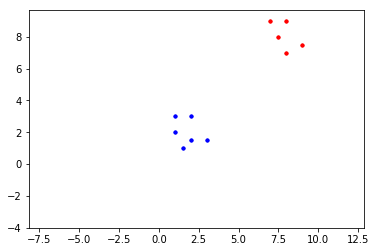

In [36]:

inputs = np.array([[1 ,3], [2, 3], [1, 2], [1.5, 1], [3, 1.5], [2, 1.5], [7, 9], [8, 7], [8, 9], [7.5, 8], [9, 7.5]])
targets = targets = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])
N = inputs.shape[0]
classA = inputs[0:6]
classB = inputs[6:]
C = 10
p=3

p_matrix = compute_global_matrix(inputs, targets, 1, N)
alphas = compute_alphas(C, N)

non_zeros_indices = return_nonzeros(alphas, inputs, targets, C)
b = get_b(non_zeros_indices, inputs, targets, 1)
title = "randomCluster_linear_"+str(9)+".png";
plot_it_all(classA, classB, alphas, inputs, targets, b, "title", 1)   

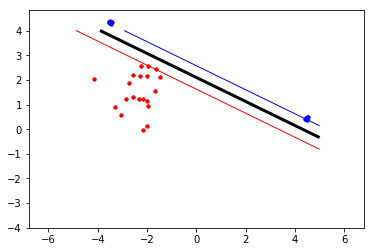

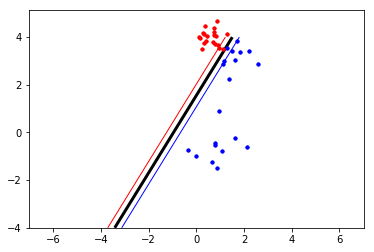

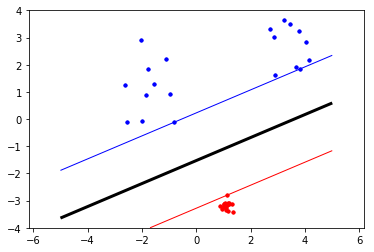

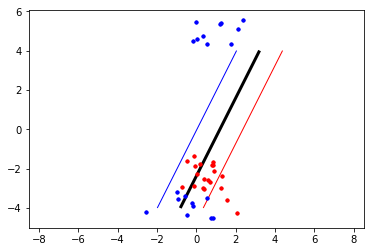

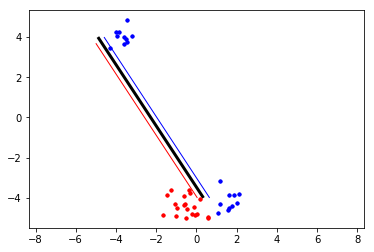

In [24]:
C=10
kernel = 0

for i in range(0, 5):
    inputs, targets, N, classA, classB = create_clusters(random.uniform(-5,5), random.uniform(-5,5), random.uniform(-5,5), 
                                                         random.uniform(-5,5), random.uniform(-5,5), random.uniform(-5,5), random.uniform(0,1), random.uniform(0,1))

    p_matrix = compute_global_matrix(inputs, targets, kernel, N)
    alphas = compute_alphas(C, N)

    non_zeros_indices = return_nonzeros(alphas, inputs, targets, C)
    b = get_b(non_zeros_indices, inputs, targets, kernel)
    title = "randomCluster_linear_"+str(i)+".png";
    plot_it_all(classA, classB, alphas, inputs, targets, b, title, kernel)   

    

### Polynomial